In [16]:
import pandas as pd
import numpy as np


In [17]:
df = pd.read_csv("health_data_.csv")  

In [18]:
df.head()


,Age,BMI,Blood_Pressure,Cholesterol_Level,Smoking_Status,Physical_Activity_Level,Diabetes,Health_Risk_Score
0,56,100.0,105,203.0,1,NaN,0,51.49
1,69,24.3,300,207.0,1,7.4,1,67.15
2,46,21.4,159,216.0,0,8.0,1,49.85
3,32,NaN,92,253.0,0,2.8,0,35.97
4,60,28.1,109,173.0,0,1.8,1,34.47


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      105 non-null    int64  
 1   BMI                      95 non-null     float64
 2   Blood_Pressure           105 non-null    int64  
 3   Cholesterol_Level        95 non-null     float64
 4   Smoking_Status           105 non-null    int64  
 5   Physical_Activity_Level  94 non-null     float64
 6   Diabetes                 105 non-null    int64  
 7   Health_Risk_Score        105 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 6.7 KB


In [20]:
df.describe()

,Age,BMI,Blood_Pressure,Cholesterol_Level,Smoking_Status,Physical_Activity_Level,Diabetes,Health_Risk_Score
count,105.000000,95.000000,105.000000,95.000000,105.000000,94.000000,105.000000,105.000000
mean,50.333333,25.514737,125.295238,228.526316,0.542857,5.200000,0.476190,55.943143
std,19.407902,8.703679,25.603832,41.699748,0.500549,3.175714,0.501828,20.988036
min,19.000000,15.000000,90.000000,154.000000,0.000000,0.100000,0.000000,0.000000
25%,34.000000,21.750000,109.000000,199.500000,0.000000,2.825000,0.000000,40.440000
50%,51.000000,24.700000,122.000000,235.000000,1.000000,5.250000,0.000000,56.070000
75%,68.000000,27.800000,138.000000,263.500000,1.000000,7.975000,1.000000,70.040000
max,79.000000,100.000000,300.000000,299.000000,1.000000,9.900000,1.000000,100.000000


In [21]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age                         0
BMI                        10
Blood_Pressure              0
Cholesterol_Level          10
Smoking_Status              0
Physical_Activity_Level    11
Diabetes                    0
Health_Risk_Score           0
dtype: int64


In [22]:
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 5


In [23]:
df["BMI"] = df["BMI"].fillna(df["BMI"].median())

In [24]:
df["Cholesterol_Level"] = df["Cholesterol_Level"].fillna(df["Cholesterol_Level"].mean())
df["Physical_Activity_Level"] = df["Physical_Activity_Level"].fillna(df["Physical_Activity_Level"].mean())

In [25]:
df = df.drop_duplicates()


In [26]:
Q1_bmi = df["BMI"].quantile(0.25)
Q3_bmi = df["BMI"].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
df = df[(df["BMI"] >= Q1_bmi - 1.5 * IQR_bmi) & (df["BMI"] <= Q3_bmi + 1.5 * IQR_bmi)]


In [27]:
Q1_bp = df["Blood_Pressure"].quantile(0.25)
Q3_bp = df["Blood_Pressure"].quantile(0.75)
IQR_bp = Q3_bp - Q1_bp
df = df[(df["Blood_Pressure"] >= Q1_bp - 1.5 * IQR_bp) & (df["Blood_Pressure"] <= Q3_bp + 1.5 * IQR_bp)]


In [28]:
df.info()
df.describe()
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 2 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      97 non-null     int64  
 1   BMI                      97 non-null     float64
 2   Blood_Pressure           97 non-null     int64  
 3   Cholesterol_Level        97 non-null     float64
 4   Smoking_Status           97 non-null     int64  
 5   Physical_Activity_Level  97 non-null     float64
 6   Diabetes                 97 non-null     int64  
 7   Health_Risk_Score        97 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 6.8 KB
Missing Values:
 Age                        0
BMI                        0
Blood_Pressure             0
Cholesterol_Level          0
Smoking_Status             0
Physical_Activity_Level    0
Diabetes                   0
Health_Risk_Score          0
dtype: int64
Duplicate Rows: 0


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nice styling
sns.set(style="whitegrid")


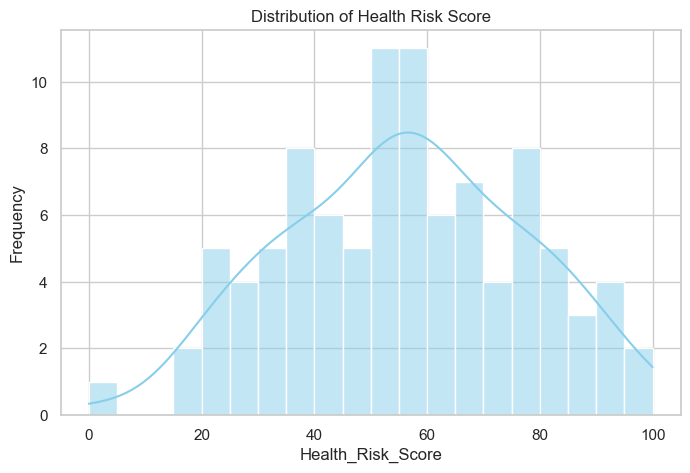

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Health_Risk_Score"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Health Risk Score")
plt.xlabel("Health_Risk_Score")
plt.ylabel("Frequency")
plt.show()


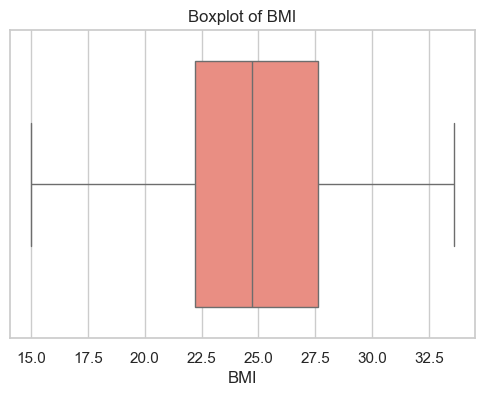

In [33]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["BMI"], color="salmon")
plt.title("Boxplot of BMI")
plt.xlabel("BMI")
plt.show()


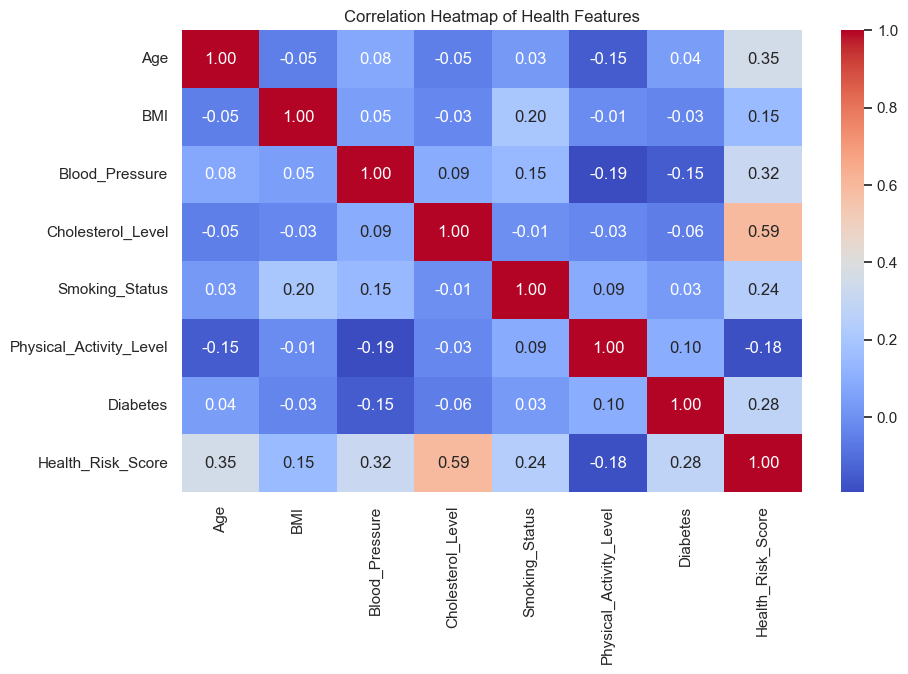

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Health Features")
plt.show()


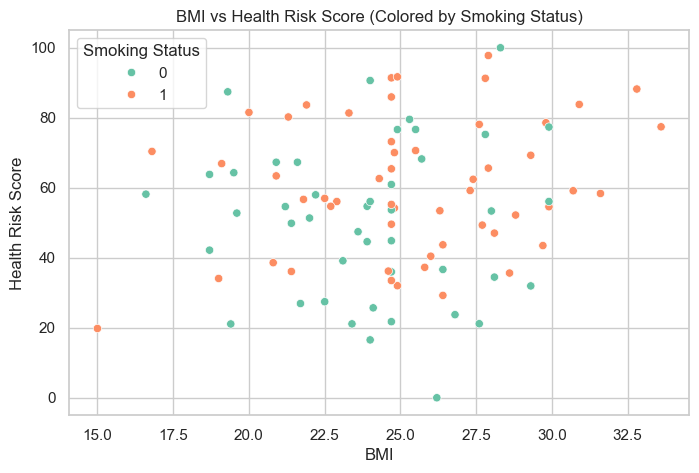

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="BMI", y="Health_Risk_Score", hue="Smoking_Status", palette="Set2")
plt.title("BMI vs Health Risk Score (Colored by Smoking Status)")
plt.xlabel("BMI")
plt.ylabel("Health Risk Score")
plt.legend(title="Smoking Status")
plt.show()


In [36]:
df.to_csv("health_data_.csv", index=False)
